<a href="https://colab.research.google.com/github/Niharika-2226/Cybersecurity_Threat_Detection_Using_AI/blob/main/cybersecurity_Threat_Detection_Usin_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google Drive and Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/NSL-KDD/KDDTrain+.txt'
test_path = '/content/drive/MyDrive/NSL-KDD/KDDTest+.txt'


Load data:

In [ ]:
import pandas as pd

train_path = '/content/drive/MyDrive/NSL-KDD/KDDTrain+.txt'
test_path = '/content/drive/MyDrive/NSL-KDD/KDDTest+.txt'

col_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent",
             "hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root",
             "num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login",
             "is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate",
             "srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count",
             "dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
             "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

train_df = pd.read_csv(train_path, names=col_names)
test_df = pd.read_csv(test_path, names=col_names)

train_df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


Data Preprocessing

In [ ]:
def preprocess(train_df, test_df):
    # Drop 'difficulty' column
    train_df = train_df.drop('difficulty', axis=1)
    test_df = test_df.drop('difficulty', axis=1)

    # Label Mapping
    train_df['label'] = train_df['label'].apply(lambda x: 0 if x == 'normal' else 1)
    test_df['label'] = test_df['label'].apply(lambda x: 0 if x == 'normal' else 1)

    # Combine train and test for consistent encoding
    combined_df = pd.concat([train_df, test_df], axis=0)
    combined_df = pd.get_dummies(combined_df, columns=['protocol_type', 'service', 'flag'])

    # Separate back
    train_df = combined_df[:len(train_df)]
    test_df = combined_df[len(train_df):]

    X_train = train_df.drop('label', axis=1)
    y_train = train_df['label']
    X_test = test_df.drop('label', axis=1)
    y_test = test_df['label']

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, y_train, X_test, y_test, scaler

X_train, y_train, X_test, y_test, scaler = preprocess(train_df, test_df)


Train a Machine Learning Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


Accuracy: 0.7700053229240597
              precision    recall  f1-score   support

           0       0.66      0.97      0.78      9711
           1       0.97      0.62      0.75     12833

    accuracy                           0.77     22544
   macro avg       0.81      0.79      0.77     22544
weighted avg       0.83      0.77      0.77     22544



Evaluate the Model

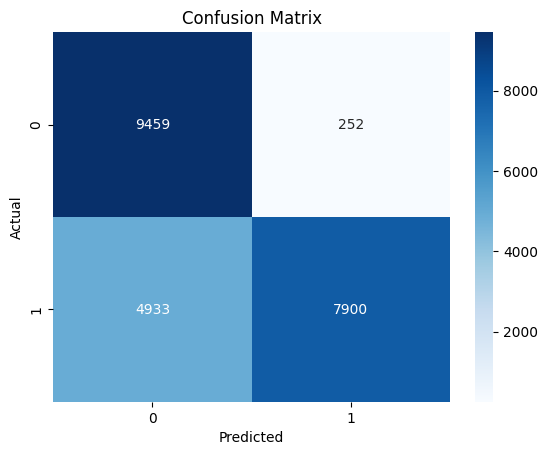

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, predictions)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Save the Model

In [ ]:
import joblib
joblib.dump(model, 'cyber_threat_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

Download the Saved Model

In [ ]:
from google.colab import files

# Download the .pkl model to your local machine
files.download('cyber_threat_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>